# 03 BMRA

Run BMRA based on global responses derived from the pathway activity predictions.

In [1]:
import pandas as pd
import numpy as np
import os
import bmra

In [2]:
cell_line = 'BC3C'

data_dir =f'/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_bmra/blca_publication_OUTPUT_bmra_{cell_line}/'
data_dir_1 = os.path.join(data_dir, f'00_outputs_2020_{cell_line}/')
data_dir_2 = os.path.join(data_dir, f'01_outputs_2020_{cell_line}/')

info_dir =f"/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/00_outputs_2020_{cell_line}/"

out_dir = os.path.join(data_dir,f'02_outputs_2020_{cell_line}/')


os.makedirs(out_dir, exist_ok = True)

## Load data

### Global responses

Assembled from global responses calculated from predicted pathway activities, and DPD global responses.

In [3]:
def assemble_R_global(pathway_rglobal_file, dpd_rglobal_file):
    """
    Assemble full R_global matrix
    """
    R_global_modules_df = pd.read_csv(pathway_rglobal_file, index_col = 0)

    perts = R_global_modules_df.columns.tolist()

    R_global_DPD_df = pd.read_csv(dpd_rglobal_file, index_col=0).T

    # filter by perts list
    R_global_DPD_df = R_global_DPD_df[R_global_DPD_df.index.isin(perts)]

    # sort by perts list
    R_global_DPD_df["sort_col"] = R_global_DPD_df.index.map({val: i for i, val in enumerate(perts)})
    R_global_DPD_df = R_global_DPD_df.sort_values("sort_col")
    R_global_DPD_df = R_global_DPD_df.drop("sort_col", axis = 1)

    # transpose
    R_global_DPD_df = R_global_DPD_df.T

    R_global_df = pd.concat([R_global_modules_df, R_global_DPD_df])

    return R_global_df

In [4]:
R_global_df = assemble_R_global(
    pathway_rglobal_file = os.path.join(data_dir_2, "R_global_annotated.csv"),
    dpd_rglobal_file = os.path.join(data_dir_1, "R_global_DPDonly_annotated.csv"),
)

modules = R_global_df.index.tolist()
exp_ids = R_global_df.columns.tolist()

R_global = R_global_df.values
n_modules = R_global.shape[0]

print(R_global.shape)
display(R_global_df)

(13, 1971)


,ASG002_BC3C_24H:A03,ASG002_BC3C_24H:A04,ASG002_BC3C_24H:A05,ASG002_BC3C_24H:A06,ASG002_BC3C_24H:J13,ASG002_BC3C_24H:J14,ASG002_BC3C_24H:J15,ASG002_BC3C_24H:J16,ASG002_BC3C_24H:J17,ASG002_BC3C_24H:J18,...,MOAR012_BC3C_24H:P15,MOAR012_BC3C_24H:P16,MOAR012_BC3C_24H:P17,MOAR012_BC3C_24H:P18,MOAR012_BC3C_24H:P19,MOAR012_BC3C_24H:P20,MOAR012_BC3C_24H:P21,MOAR012_BC3C_24H:P22,MOAR012_BC3C_24H:P23,MOAR012_BC3C_24H:P24
Androgen,-0.001004,-0.036575,-0.001015,0.018552,0.011435,0.058470,0.045842,0.005410,0.043351,0.034086,...,-0.042211,-0.005753,-0.289057,-0.028941,-0.046035,0.067688,-0.049117,-0.019516,-0.120294,0.117488
CDK1,-0.107155,-0.027749,-0.170211,-0.165788,-0.071171,-0.023798,0.332107,0.097408,-0.066428,0.060357,...,0.313367,0.115013,0.311394,0.387438,-0.469813,-0.220334,0.126878,-0.049240,0.236259,0.073994
CDK2,-0.027338,-0.000981,-0.020390,-0.024261,-0.003196,0.024913,0.047951,0.093718,-0.015713,-0.009533,...,-0.131529,-0.058768,-0.200715,-0.058656,-0.134046,-0.099201,0.001589,-0.051774,-0.078393,0.005564
CDK4_6,-0.068674,-0.092957,0.064813,-0.105586,0.112189,0.064218,0.099836,0.289216,0.087235,-0.100294,...,0.187299,0.209502,0.357975,-0.264725,-0.827796,-0.325305,-0.097651,-0.298316,-0.305687,-0.262353
EGFR,0.355335,0.165300,0.322619,0.010396,0.308689,-0.877414,-0.616765,-0.568826,-0.590209,-0.520601,...,0.502227,0.460392,0.514980,0.381313,0.176064,0.341794,0.293880,0.191960,0.514549,0.436025
Estrogen,-0.654487,-0.096200,-0.210312,0.065807,0.537020,-0.147662,0.487496,-0.235995,0.067327,0.281395,...,0.078760,0.126119,0.628289,0.157741,0.330497,0.261924,0.128900,-0.160335,-0.224909,-0.274088
FGFR,0.016716,-0.007146,0.008861,-0.022626,-0.007839,-0.017687,-0.049999,-0.068068,-0.080346,-0.047682,...,0.359879,0.356197,0.180944,0.334883,-0.191376,-0.473883,0.071754,0.052075,-0.785139,-0.092459
PI3K,-0.324839,-0.853677,0.274759,-0.502169,0.262750,0.313225,0.487181,0.175551,-0.067300,0.090341,...,-0.145342,-0.365778,0.415244,-0.278208,-0.846053,-0.725097,-0.237873,0.065428,-0.588796,-0.001559
p53,-0.292842,-0.158038,0.030774,-0.127970,-0.112705,-0.113667,-0.163947,-0.021778,-0.169898,0.146145,...,0.165787,0.302081,0.665569,0.550028,0.490929,0.193557,0.289949,0.148833,0.403616,0.431188
TOP2A,0.063583,-0.129512,-0.290024,-0.099613,0.130848,0.162122,0.286798,0.286001,-0.163816,0.077335,...,-0.049736,-0.181214,0.090146,-0.156399,-0.106650,-0.398094,0.246172,-0.128153,-0.362487,0.354435


In [5]:
print(R_global_df.values.min())
print(R_global_df.values.max())

-44.17198603790521
33.795376506153325


### Perturbation matrix

In [6]:
inhib_conc_df = pd.read_csv(os.path.join(data_dir_1, "inhib_conc_annotated.csv"), index_col = 0)
#LFC_PLCg = pd.read_csv(os.path.join(info_dir,"PLCg_Data_log_2020.csv"),index_col=0)
#inhib_conc = inhib_conc_df.drop(columns=LFC_PLCg.index).values
inhib_conc = inhib_conc_df.values

n_DPDs = R_global.shape[0] - inhib_conc.shape[0]

pert_modules = np.where(inhib_conc != 0, 1, 0)
pert_DPD = np.zeros((n_DPDs, len(exp_ids)))

pert = np.vstack([pert_modules, pert_DPD])

print(pert.shape)
print(pert)

(13, 1971)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Networks

In [9]:
# empty prior
#G_prior = np.zeros((n_modules, n_modules))
G_prior_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020_Jing.xlsx"), sheet_name = "prior_net_work", index_col = 0)

G_prior = G_prior_df.values
G_prior_df

,CDK1,CDK2,CDK4_6,EGFR,PI3K,FGFR,TOP2A,p53,Estrogen,Androgen,blca_inv,blca_onc,surv_coef
CDK1,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK2,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK4_6,0,0,0,0,0,0,0,0,0,0,0,0,0
EGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
PI3K,0,0,0,0,0,0,0,0,0,0,0,0,0
FGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
TOP2A,0,0,0,0,0,0,0,0,0,0,0,0,0
p53,0,0,0,0,0,0,0,0,0,0,0,0,0
Estrogen,0,0,0,0,0,0,0,0,0,0,0,0,0
Androgen,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
#G_prior_r_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020.xlsx"), sheet_name = "prior_r", index_col = 0)

#G_prior_r = G_prior_r_df.values
#G_prior_r_df

In [11]:
G_not = np.eye(n_modules)
G_not[:, n_modules - n_DPDs :] = 1

G_not

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

## Run BMRA

In [12]:
n_gibbs = 200_000
n_window = 5_000

mode = "all"
n_iterations = 1

In [13]:
A_mean, A_sd, r_mean, r_sd = bmra.run_bmra(R_global,
            pert,
            G_prior,
            G_not,
            #r_prior = G_prior_r,
            n_gibbs = n_gibbs,
            n_window = n_window,
            mode = mode,
            n_iterations = n_iterations,
        )

A_mean_df = pd.DataFrame(A_mean, index = modules, columns = modules)
A_sd_df = pd.DataFrame(A_sd, index = modules, columns = modules)
r_mean_df = pd.DataFrame(r_mean, index = modules, columns = modules)
r_sd_df = pd.DataFrame(r_sd, index = modules, columns = modules)

display(A_mean_df)
display(A_sd_df)
display(r_mean_df)
display(r_sd_df)

A_mean_df.to_csv(os.path.join(out_dir, "A_mean.csv"))
A_sd_df.to_csv(os.path.join(out_dir, "A_sd.csv"))
r_mean_df.to_csv(os.path.join(out_dir, "r_mean.csv"))
r_sd_df.to_csv(os.path.join(out_dir, "r_sd.csv"))

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,1.000000,1.0,0.000000,1.000000,1.000000,0.00578,1.000000,1.000000,1.0,0.0,0.0,0.0
CDK1,1.0,0.000000,0.0,0.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.0,0.0,0.0,0.0
CDK2,1.0,0.000000,0.0,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.0,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.0,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.0,0.0,0.0,0.0
EGFR,1.0,1.000000,0.0,0.000000,0.000000,0.002459,1.00000,1.000000,1.000000,1.0,0.0,0.0,0.0
Estrogen,1.0,1.000000,0.0,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.0,0.0,0.0,0.0
FGFR,0.0,0.000000,1.0,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.0,0.0,0.0,0.0
PI3K,1.0,0.000163,1.0,1.000000,1.000000,0.228021,0.00000,0.000000,1.000000,1.0,0.0,0.0,0.0
p53,1.0,1.000000,0.0,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.0,0.0,0.0,0.0
TOP2A,1.0,0.000000,0.0,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,0.0,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.000000e+00,2.220446e-15,2.220446e-15,0.000000e+00,2.220446e-15,2.220446e-15,7.580591e-02,2.220446e-15,2.220446e-15,2.220446e-15,0.0,0.0,0.0
CDK1,2.220446e-16,0.000000e+00,0.000000e+00,0.000000e+00,2.220446e-16,2.220446e-16,0.000000e+00,0.000000e+00,2.220446e-16,0.000000e+00,0.0,0.0,0.0
CDK2,4.440892e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.440892e-16,4.440892e-16,0.000000e+00,0.000000e+00,0.0,0.0,0.0
CDK4_6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.881784e-16,8.881784e-16,8.881784e-16,8.881784e-16,8.881784e-16,0.0,0.0,0.0
EGFR,1.998401e-15,1.998401e-15,0.000000e+00,0.000000e+00,0.000000e+00,4.953115e-02,1.998401e-15,1.998401e-15,1.998401e-15,1.998401e-15,0.0,0.0,0.0
Estrogen,9.992007e-16,9.992007e-16,0.000000e+00,9.992007e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.992007e-16,0.000000e+00,0.0,0.0,0.0
FGFR,0.000000e+00,0.000000e+00,2.220446e-15,2.220446e-15,2.220446e-15,0.000000e+00,0.000000e+00,0.000000e+00,2.220446e-15,2.220446e-15,0.0,0.0,0.0
PI3K,2.886580e-15,1.275590e-02,2.886580e-15,2.886580e-15,2.886580e-15,4.195565e-01,0.000000e+00,0.000000e+00,2.886580e-15,2.886580e-15,0.0,0.0,0.0
p53,4.440892e-16,4.440892e-16,0.000000e+00,4.440892e-16,4.440892e-16,4.440892e-16,4.440892e-16,4.440892e-16,0.000000e+00,4.440892e-16,0.0,0.0,0.0
TOP2A,2.664535e-15,0.000000e+00,0.000000e+00,2.664535e-15,2.664535e-15,0.000000e+00,2.664535e-15,2.664535e-15,2.664535e-15,0.000000e+00,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.000000,0.075566,0.086275,0.000000,-0.100650,0.072913,-0.000098,0.037414,0.047958,-0.050073,0.0,0.0,0.0
CDK1,0.159392,0.000000,0.000000,0.000000,0.096309,0.159027,0.000000,0.000000,0.047238,0.000000,0.0,0.0,0.0
CDK2,0.076599,0.000000,0.000000,0.000000,0.000000,0.000000,0.032218,0.102420,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.000000,0.000000,0.000000,0.000000,0.000000,0.123094,0.101510,0.164564,0.030375,0.226534,0.0,0.0,0.0
EGFR,-0.331111,0.147569,0.000000,0.000000,0.000000,-0.000140,0.277956,-0.188697,0.190646,-0.123064,0.0,0.0,0.0
Estrogen,0.125915,0.119915,0.000000,0.144005,0.000000,0.000000,0.000000,0.000000,0.038078,0.000000,0.0,0.0,0.0
FGFR,0.000000,0.000000,0.090795,0.173753,0.222362,0.000000,0.000000,0.000000,0.079306,0.106761,0.0,0.0,0.0
PI3K,0.117362,0.000006,0.327666,0.290465,-0.122298,0.012940,0.000000,0.000000,0.061763,0.313419,0.0,0.0,0.0
p53,0.336042,0.159179,0.000000,0.123328,0.372172,0.136534,0.204107,0.144682,0.000000,-0.290801,0.0,0.0,0.0
TOP2A,-0.090132,0.000000,0.000000,0.262337,-0.077629,0.000000,0.074494,0.186801,-0.079290,0.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.000000,0.007572,0.011956,0.000000,0.005526,0.008381,0.001349,0.006275,0.004095,0.007598,0.0,0.0,0.0
CDK1,0.008593,0.000000,0.000000,0.000000,0.004189,0.006412,0.000000,0.000000,0.003200,0.000000,0.0,0.0,0.0
CDK2,0.007916,0.000000,0.000000,0.000000,0.000000,0.000000,0.004784,0.004172,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.000000,0.000000,0.000000,0.000000,0.000000,0.007248,0.005926,0.005475,0.003618,0.007048,0.0,0.0,0.0
EGFR,0.015203,0.010559,0.000000,0.000000,0.000000,0.002855,0.009521,0.008542,0.005562,0.011017,0.0,0.0,0.0
Estrogen,0.007716,0.005515,0.000000,0.005578,0.000000,0.000000,0.000000,0.000000,0.002808,0.000000,0.0,0.0,0.0
FGFR,0.000000,0.000000,0.015991,0.011652,0.007594,0.000000,0.000000,0.000000,0.005611,0.010696,0.0,0.0,0.0
PI3K,0.014921,0.000446,0.015492,0.012135,0.007235,0.024484,0.000000,0.000000,0.005639,0.010438,0.0,0.0,0.0
p53,0.027541,0.019074,0.000000,0.022240,0.014088,0.021014,0.017426,0.015945,0.000000,0.020317,0.0,0.0,0.0
TOP2A,0.011632,0.000000,0.000000,0.009145,0.006238,0.000000,0.007398,0.006683,0.004432,0.000000,0.0,0.0,0.0


In [14]:
np.fill_diagonal(r_mean_df.values,-1)
rm_minus_inv = pd.DataFrame(np.linalg.pinv(r_mean_df),index=r_mean_df.index,columns=r_mean_df.columns)*(-1)
rm_minus_inv.to_csv(os.path.join(out_dir, 'r_minv.csv'))
display(rm_minus_inv)

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,1.096236,0.089964,0.119567,0.035881,-0.092752,0.106579,-0.010055,0.079051,0.050460,-0.026320,-1.685963e-16,-2.835923e-16,-9.964187e-17
CDK1,0.190609,1.076162,0.020962,0.040916,0.140568,0.204188,0.061932,-0.003375,0.103844,-0.042218,2.402326e-16,2.438127e-16,-3.382716e-16
CDK2,0.106460,0.010141,1.058657,0.067310,-0.016799,0.021204,0.043071,0.139050,0.012762,0.056453,-1.321962e-16,1.113225e-16,5.228026e-18
CDK4_6,0.057440,0.030374,0.118015,1.245578,-0.014862,0.172670,0.163964,0.299611,0.047239,0.378791,1.375881e-16,2.544309e-16,1.153283e-16
EGFR,-0.311520,0.217446,-0.085566,-0.050443,1.299855,0.039839,0.389127,-0.286940,0.278886,-0.285283,1.247351e-16,1.547528e-17,-8.789574e-17
Estrogen,0.182722,0.157512,0.037885,0.195962,0.024245,1.073027,0.045008,0.055038,0.071958,0.033389,2.759253e-16,-2.574754e-16,-2.804759e-16
FGFR,-0.026419,0.077238,0.116476,0.272640,0.312727,0.065997,1.159220,0.041213,0.158133,0.115291,3.836761e-16,-5.860118e-17,6.408009e-17
PI3K,0.227893,0.007430,0.446649,0.544593,-0.193031,0.106565,0.063396,1.285552,0.037118,0.534603,2.711191e-16,3.297036e-16,-8.795931e-17
p53,0.356118,0.335153,0.087218,0.188238,0.556955,0.269345,0.400128,0.061540,1.217216,-0.335692,2.389805e-16,2.042337e-16,1.553680e-16
TOP2A,-0.047189,-0.036453,0.112021,0.434559,-0.153368,0.036066,0.080184,0.332082,-0.091604,1.258959,-1.083712e-16,8.106674e-17,-4.209467e-17


In [15]:
con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in r_mean_df.index:
    for con_from in r_mean_df.columns:
        if ((r_mean_df.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,r_mean_df.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net.txt'),sep='\t',index=False)
display(con_mat)

,From,To,Strength
0,CDK1,Androgen,0.075566
1,CDK2,Androgen,0.086275
2,EGFR,Androgen,-0.100650
3,Estrogen,Androgen,0.072913
4,FGFR,Androgen,-0.000098
...,...,...,...
73,p53,blca_oncogenesis,-0.453618
74,Androgen,blca_survival,5.552427
75,CDK1,blca_survival,5.055851
76,EGFR,blca_survival,-3.293709


In [16]:
# now the same but with filtered matrices
# threshold value
Athr = 0.5

rm_filt = r_mean_df[np.abs(A_mean_df) > Athr].fillna(0).copy()
np.fill_diagonal(rm_filt.values,-1)
rm_filt.to_csv(os.path.join(out_dir, 'r_mean_filt.csv'))
display(rm_filt)

rm_filt_minus_inv = pd.DataFrame(np.linalg.pinv(rm_filt),index=rm_filt.index,columns=rm_filt.columns)*(-1)
rm_filt_minus_inv.to_csv(os.path.join(out_dir, 'r_minv_filt.csv'))
display(rm_minus_inv)

con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in rm_filt.index:
    for con_from in rm_filt.columns:
        if ((rm_filt.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,rm_filt.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net_filt.txt'),sep='\t',index=False)
#display(con_mat)


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,-1.000000,0.075566,0.086275,0.000000,-0.100650,0.072913,0.000000,0.037414,0.047958,-0.050073,0.0,0.0,0.0
CDK1,0.159392,-1.000000,0.000000,0.000000,0.096309,0.159027,0.000000,0.000000,0.047238,0.000000,0.0,0.0,0.0
CDK2,0.076599,0.000000,-1.000000,0.000000,0.000000,0.000000,0.032218,0.102420,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.000000,0.000000,0.000000,-1.000000,0.000000,0.123094,0.101510,0.164564,0.030375,0.226534,0.0,0.0,0.0
EGFR,-0.331111,0.147569,0.000000,0.000000,-1.000000,0.000000,0.277956,-0.188697,0.190646,-0.123064,0.0,0.0,0.0
Estrogen,0.125915,0.119915,0.000000,0.144005,0.000000,-1.000000,0.000000,0.000000,0.038078,0.000000,0.0,0.0,0.0
FGFR,0.000000,0.000000,0.090795,0.173753,0.222362,0.000000,-1.000000,0.000000,0.079306,0.106761,0.0,0.0,0.0
PI3K,0.117362,0.000000,0.327666,0.290465,-0.122298,0.000000,0.000000,-1.000000,0.061763,0.313419,0.0,0.0,0.0
p53,0.336042,0.159179,0.000000,0.123328,0.372172,0.136534,0.204107,0.144682,-1.000000,-0.290801,0.0,0.0,0.0
TOP2A,-0.090132,0.000000,0.000000,0.262337,-0.077629,0.000000,0.074494,0.186801,-0.079290,-1.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,1.096236,0.089964,0.119567,0.035881,-0.092752,0.106579,-0.010055,0.079051,0.050460,-0.026320,-1.685963e-16,-2.835923e-16,-9.964187e-17
CDK1,0.190609,1.076162,0.020962,0.040916,0.140568,0.204188,0.061932,-0.003375,0.103844,-0.042218,2.402326e-16,2.438127e-16,-3.382716e-16
CDK2,0.106460,0.010141,1.058657,0.067310,-0.016799,0.021204,0.043071,0.139050,0.012762,0.056453,-1.321962e-16,1.113225e-16,5.228026e-18
CDK4_6,0.057440,0.030374,0.118015,1.245578,-0.014862,0.172670,0.163964,0.299611,0.047239,0.378791,1.375881e-16,2.544309e-16,1.153283e-16
EGFR,-0.311520,0.217446,-0.085566,-0.050443,1.299855,0.039839,0.389127,-0.286940,0.278886,-0.285283,1.247351e-16,1.547528e-17,-8.789574e-17
Estrogen,0.182722,0.157512,0.037885,0.195962,0.024245,1.073027,0.045008,0.055038,0.071958,0.033389,2.759253e-16,-2.574754e-16,-2.804759e-16
FGFR,-0.026419,0.077238,0.116476,0.272640,0.312727,0.065997,1.159220,0.041213,0.158133,0.115291,3.836761e-16,-5.860118e-17,6.408009e-17
PI3K,0.227893,0.007430,0.446649,0.544593,-0.193031,0.106565,0.063396,1.285552,0.037118,0.534603,2.711191e-16,3.297036e-16,-8.795931e-17
p53,0.356118,0.335153,0.087218,0.188238,0.556955,0.269345,0.400128,0.061540,1.217216,-0.335692,2.389805e-16,2.042337e-16,1.553680e-16
TOP2A,-0.047189,-0.036453,0.112021,0.434559,-0.153368,0.036066,0.080184,0.332082,-0.091604,1.258959,-1.083712e-16,8.106674e-17,-4.209467e-17


In [17]:
# number of zero elements in the matrix
display(len(rm_filt.index)*len(rm_filt.columns) - rm_filt.astype(bool).sum().sum())

85

In [18]:
# number of non-zero elements in the matrix
display(rm_filt.astype(bool).sum().sum() - len(modules))

71

### Visualization

In [19]:
df_subset=rm_filt_minus_inv[[ 'CDK1', 'CDK2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'PI3K', 'p53', 'TOP2A']]
df_subset = df_subset.loc[['blca_invasiveness',	'blca_oncogenesis',	'blca_survival']]

In [20]:
t_df_subset=df_subset.T
df_subset.reset_index(inplace=True)

Text(0.5, 1.0, 'Predicted global signaling pathway responses of BC3C cell line under conditions ')

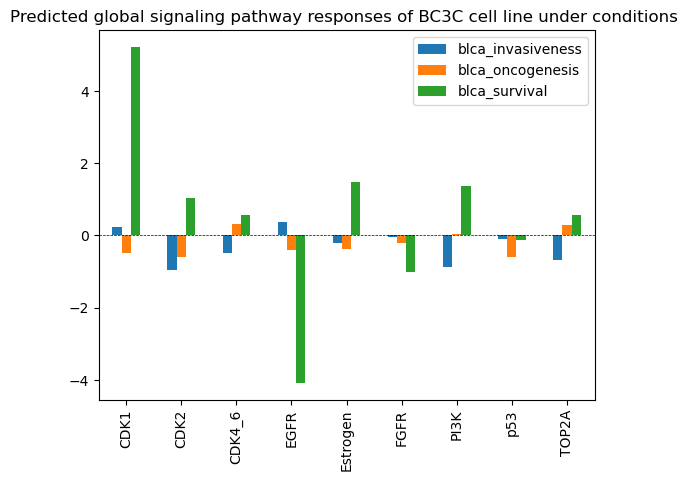

In [21]:
import matplotlib.pyplot as plt
t_df_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted global signaling pathway responses of {cell_line} cell line under conditions ")

In [22]:
display(rm_filt)
rm_subset=rm_filt[['CDK1', 'CDK2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'PI3K', 'p53', 'TOP2A']]

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,-1.000000,0.075566,0.086275,0.000000,-0.100650,0.072913,0.000000,0.037414,0.047958,-0.050073,0.0,0.0,0.0
CDK1,0.159392,-1.000000,0.000000,0.000000,0.096309,0.159027,0.000000,0.000000,0.047238,0.000000,0.0,0.0,0.0
CDK2,0.076599,0.000000,-1.000000,0.000000,0.000000,0.000000,0.032218,0.102420,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.000000,0.000000,0.000000,-1.000000,0.000000,0.123094,0.101510,0.164564,0.030375,0.226534,0.0,0.0,0.0
EGFR,-0.331111,0.147569,0.000000,0.000000,-1.000000,0.000000,0.277956,-0.188697,0.190646,-0.123064,0.0,0.0,0.0
Estrogen,0.125915,0.119915,0.000000,0.144005,0.000000,-1.000000,0.000000,0.000000,0.038078,0.000000,0.0,0.0,0.0
FGFR,0.000000,0.000000,0.090795,0.173753,0.222362,0.000000,-1.000000,0.000000,0.079306,0.106761,0.0,0.0,0.0
PI3K,0.117362,0.000000,0.327666,0.290465,-0.122298,0.000000,0.000000,-1.000000,0.061763,0.313419,0.0,0.0,0.0
p53,0.336042,0.159179,0.000000,0.123328,0.372172,0.136534,0.204107,0.144682,-1.000000,-0.290801,0.0,0.0,0.0
TOP2A,-0.090132,0.000000,0.000000,0.262337,-0.077629,0.000000,0.074494,0.186801,-0.079290,-1.000000,0.0,0.0,0.0


In [23]:
rm_subset=rm_subset.loc[['blca_invasiveness',	'blca_oncogenesis',	'blca_survival']]
rm_subset=rm_subset.T
display(rm_subset)

,blca_invasiveness,blca_oncogenesis,blca_survival
CDK1,0.244541,-0.280594,5.055851
CDK2,-0.633576,-0.582320,0.000000
CDK4_6,0.000000,0.384043,0.000000
EGFR,0.198679,-0.069903,-3.293709
Estrogen,-0.151192,-0.258165,0.000000
FGFR,0.000000,0.000000,0.000000
PI3K,-0.485739,0.000000,0.000000
p53,-0.134320,-0.453618,0.000000
TOP2A,-0.274888,0.000000,0.000000


Text(0.5, 1.0, 'Predicted local signaling pathway responses of BC3C cell line under conditions ')

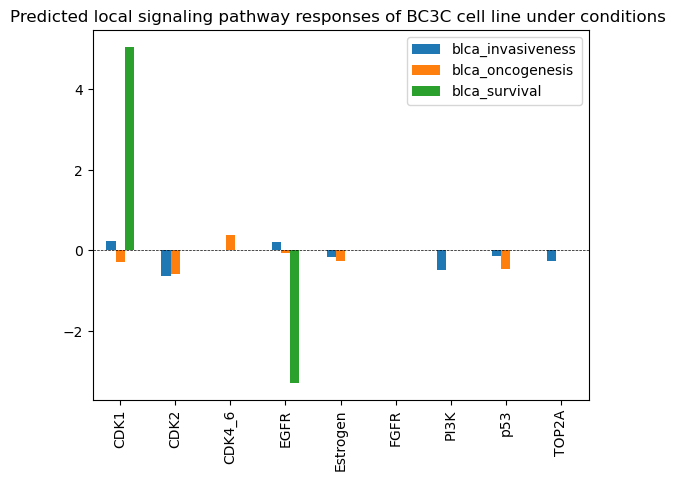

In [24]:
rm_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted local signaling pathway responses of {cell_line} cell line under conditions ")